In [1]:
# RBF kernel PCA
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma * mat_sq_dists)
    
    # center the matrix
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # obtaining eigenpairs
    eigvals, eigvecs = eigh(K)
    
    X_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    return X_pc

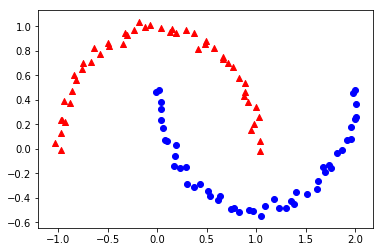

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 100, random_state = 123, noise = 0.03)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = '^')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'o')
plt.show()

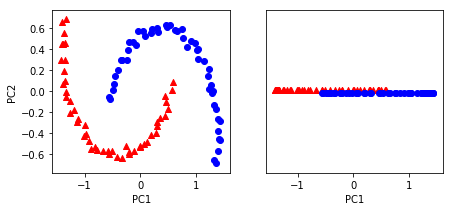

In [3]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color = 'red', marker = '^')
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color = 'blue', marker = 'o')
ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^')
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

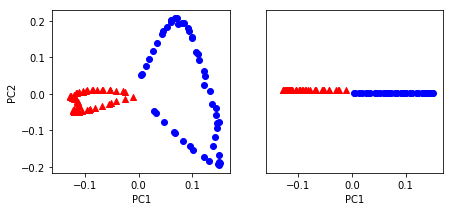

In [4]:
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^')
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o')
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^')
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

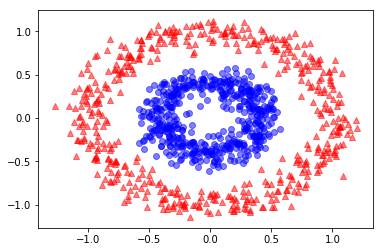

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.4)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

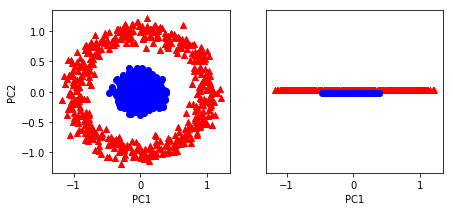

In [9]:
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color = 'red', marker = '^')
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color = 'blue', marker = 'o')
ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^')
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

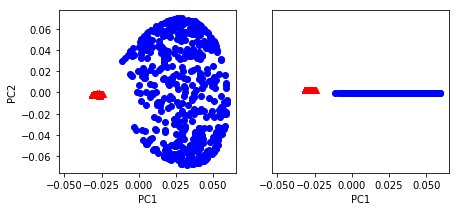

In [10]:
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^')
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o')
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^')
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

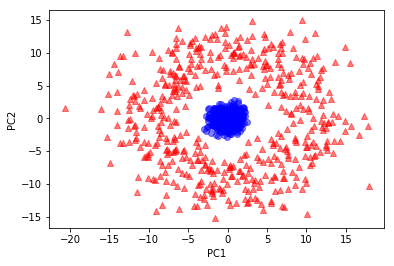

In [20]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2, kernel='poly', gamma = 5)
X_skernpca = scikit_kpca.fit_transform(X)
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()